In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from help_functions.prepare_data import most_recent_thursday, most_recent_wednesday
from help_functions.evaluate_energymodels import evaluate_different_energymodels

from energy_consumption.help_functions.get_energy_data import get_data
from energy_consumption.models.seasonal_QR_hourly import get_seasonal_QR_hourly
from energy_consumption.models.seasonal_QR import get_seasonal_QR
from energy_consumption.models.seasonal_QR_hh import get_seasonal_QR_hourly_holidays

In [2]:
df = get_data()

100%|██████████| 101/101 [01:04<00:00,  1.57it/s]


In [3]:
df

,energy_consumption
date_time,
2021-12-20 00:00:00,49.57150
2021-12-20 01:00:00,47.99850
2021-12-20 02:00:00,47.46700
2021-12-20 03:00:00,47.96675
2021-12-20 04:00:00,49.45700
...,...
2023-11-22 08:00:00,65.75125
2023-11-22 09:00:00,67.40950
2023-11-22 10:00:00,68.26775


In [4]:
from energy_consumption.help_functions import handle_outstanding_dp
df = handle_outstanding_dp.impute_outstanding_dp(df)
df.isna().sum()

energy_consumption    0
dtype: int64

In [5]:
# Functions work
seasonal_hourly = {
    'name': 'seasonal model hourly',
    'function': get_seasonal_QR_hourly
}
seasonal_ct = {
    'name': 'seasonal model with time mapping',
    'function': get_seasonal_QR
}

seasonal_hh = {
    'name': 'seasonal model hourly and holidays',
    'function': get_seasonal_QR_hourly_holidays
}

models = [seasonal_hourly, seasonal_ct, seasonal_hh]
evaluation = evaluate_different_energymodels(
    models, df, last_x=20, years=False, months=False, weeks=True)

*********** Start the evaluation of model seasonal model hourly***********


C:\Users\Maria\Documents\Studium\Pyhton Projekte\PTSFC\energy_consumption\help_functions\dummy_mapping.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['month'] = energy_df.index.month


DatetimeIndex(['2023-11-17 12:00:00', '2023-11-17 16:00:00',
               '2023-11-17 20:00:00', '2023-11-18 12:00:00',
               '2023-11-18 16:00:00', '2023-11-18 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-11-10 12:00:00', '2023-11-10 16:00:00',
               '2023-11-10 20:00:00', '2023-11-11 12:00:00',
               '2023-11-11 16:00:00', '2023-11-11 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-11-03 12:00:00', '2023-11-03 16:00:00',
               '2023-11-03 20:00:00', '2023-11-04 12:00:00',
               '2023-11-04 16:00:00', '2023-11-04 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-10-27 12:00:00', '2023-10-27 16:00:00',
               '2023-10-27 20:00:00', '2023-10-28 12:00:00',
               '2023-10-28 16:00:00', '2023-10-28 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=No

c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


DatetimeIndex(['2023-11-10 12:00:00', '2023-11-10 16:00:00',
               '2023-11-10 20:00:00', '2023-11-11 12:00:00',
               '2023-11-11 16:00:00', '2023-11-11 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-11-03 12:00:00', '2023-11-03 16:00:00',
               '2023-11-03 20:00:00', '2023-11-04 12:00:00',
               '2023-11-04 16:00:00', '2023-11-04 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-10-27 12:00:00', '2023-10-27 16:00:00',
               '2023-10-27 20:00:00', '2023-10-28 12:00:00',
               '2023-10-28 16:00:00', '2023-10-28 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=None)
DatetimeIndex(['2023-10-20 12:00:00', '2023-10-20 16:00:00',
               '2023-10-20 20:00:00', '2023-10-21 12:00:00',
               '2023-10-21 16:00:00', '2023-10-21 20:00:00'],
              dtype='datetime64[ns]', name='date_time', freq=No

### Visualize Comparison 

1. Create a table that only contains the different scores of the different models

In [12]:
horizons = ['36 hour', '40 hour', '44 hour', '60 hour', '64 hour', '68 hour']
scores = []
names = []
for h in horizons:
    for m in models:
        col_name = f'{m["name"]}: {h}'
        scores.append(m['evaluation']['score']
                      [m['evaluation']['horizon'] == h])
        names.append(col_name)

score_df = pd.concat(scores, axis=1, keys=names)

2.  Plot the densities of the obtained scores

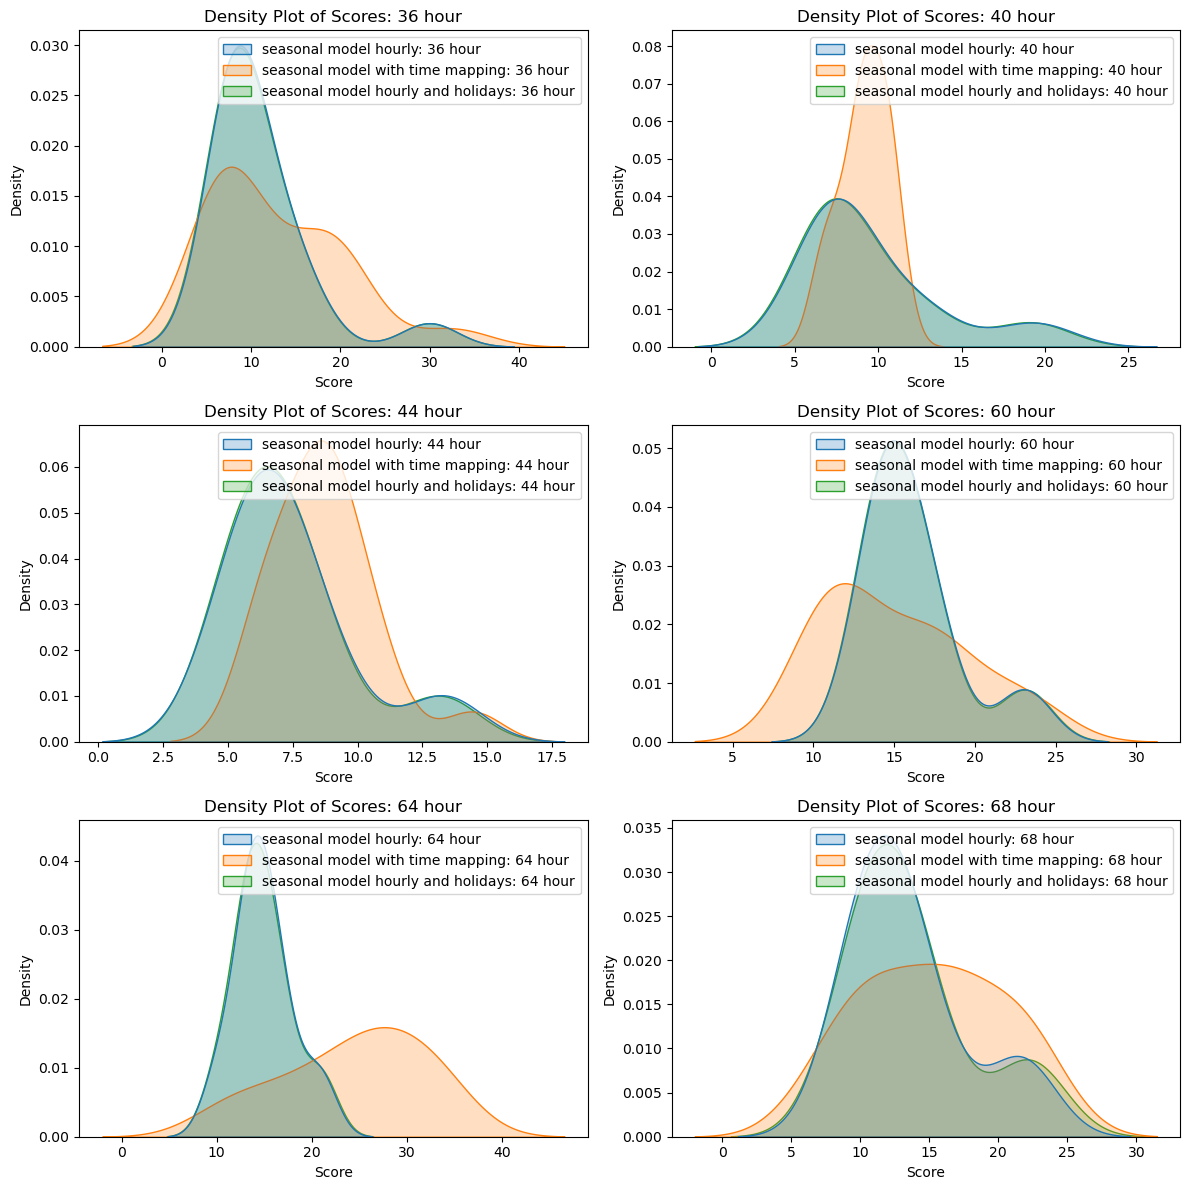

In [13]:
# Create subplots
fig, axes = plt.subplots(3,2, figsize=(12,12))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

# Loop through each horizon
for i, h in enumerate(horizons):
    # Select columns related to the current horizon
    relevant_cols = [f'{m["name"]}: {h}' for m in models]

    # Filter the relevant data for the current horizon
    data_subset = score_df.loc[:, relevant_cols]

    # Create a KDE plot for the current horizon
    sns.kdeplot(data=data_subset, fill=True, ax=axes[i])

    # Set labels and title for each subplot
    axes[i].set_xlabel('Score')
    axes[i].set_ylabel('Density')
    axes[i].set_title(f'Density Plot of Scores: {h}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()

# Display the plots
plt.show()

Interpretation: Für Freitag ist timely besser, für Samstag nicht

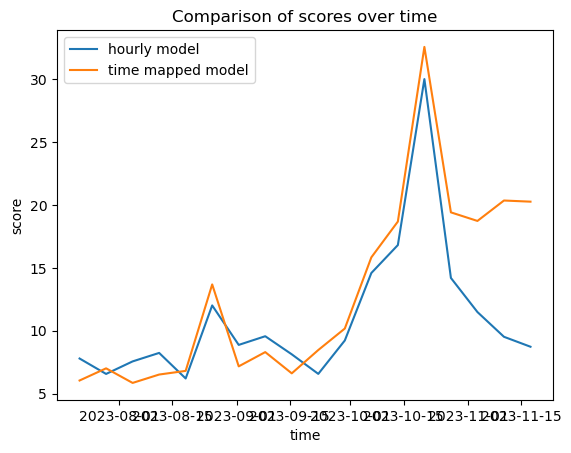

In [14]:
# Plot values from two columns over time
score_df_36_no_na = score_df[score_df['seasonal model hourly: 36 hour'].notna(
)]
# plt.plot(score_df_36_no_na.index, score_df_36_no_na['baseline: 36 hour'], label='baseline')
plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model hourly: 36 hour'], label='hourly model')

plt.plot(score_df_36_no_na.index,
         score_df_36_no_na['seasonal model with time mapping: 36 hour'], label='time mapped model')

# Adding labels and title
plt.xlabel('time')
plt.ylabel('score')
plt.title('Comparison of scores over time')

# Display legend
plt.legend()

# Show the plot
plt.show()